## ＳＰＲＩＮＴ ２２　ＬＳＴＭ

## 【問題1】各種手法の実行

Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。
    SimpleRNN
    GRU
    LSTM
    ConvLSTM2D
これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。

In [1]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 16

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [ ]:

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


In [2]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...


C:\Users\hirot\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 342s 14ms/step - loss: 0.4607 - accuracy: 0.7821 - val_loss: 0.3823 - val_accuracy: 0.8326
Epoch 2/10
25000/25000 [==============================] - 363s 15ms/step - loss: 0.2942 - accuracy: 0.8814 - val_loss: 0.3855 - val_accuracy: 0.8336
Epoch 3/10
25000/25000 [==============================] - 416s 17ms/step - loss: 0.2069 - accuracy: 0.9206 - val_loss: 0.4179 - val_accuracy: 0.8261
Epoch 4/10
25000/25000 [==============================] - 450s 18ms/step - loss: 0.1406 - accuracy: 0.9480 - val_loss: 0.4905 - val_accuracy: 0.8312
Epoch 5/10
25000/25000 [==============================] - 398s 16ms/step - loss: 0.0944 - accuracy: 0.9683 - val_loss: 0.5961 - val_accuracy: 0.8203
Epoch 6/10
25000/25000 [==============================] - 478s 19ms/step - loss: 0.0646 - accuracy: 0.9778 - val_loss: 0.6158 - val_accuracy: 0.8246
Epoch 7/10
25000/25000 [==============================] 

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras.layers import SimpleRNN

model1 = Sequential()
model1.add(Embedding(max_features, 128))
model1.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(1, activation='sigmoid'))

In [4]:
# try using different optimizers and different optimizer configs
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...


C:\Users\hirot\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 218s 9ms/step - loss: 0.6558 - accuracy: 0.5884 - val_loss: 0.5211 - val_accuracy: 0.7422
Epoch 2/10
25000/25000 [==============================] - 238s 10ms/step - loss: 0.5123 - accuracy: 0.7499 - val_loss: 0.4754 - val_accuracy: 0.7950
Epoch 3/10
25000/25000 [==============================] - 188s 8ms/step - loss: 0.4434 - accuracy: 0.8034 - val_loss: 0.5267 - val_accuracy: 0.7670
Epoch 4/10
25000/25000 [==============================] - 176s 7ms/step - loss: 0.4139 - accuracy: 0.8173 - val_loss: 0.5162 - val_accuracy: 0.7709
Epoch 5/10
25000/25000 [==============================] - 173s 7ms/step - loss: 0.3631 - accuracy: 0.8490 - val_loss: 0.5663 - val_accuracy: 0.7496
Epoch 6/10
25000/25000 [==============================] - 173s 7ms/step - loss: 0.3405 - accuracy: 0.8600 - val_loss: 0.5949 - val_accuracy: 0.7469
Epoch 7/10
25000/25000 [==============================] - 171

NameError: name 'model' is not defined

In [5]:
score, acc = model1.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 15s 607us/step
Test score: 0.610604916396141
Test accuracy: 0.7585600018501282


In [11]:
from keras.layers import GRU

model2 = Sequential()
model2.add(Embedding(max_features, 128))
model2.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(1, activation='sigmoid'))

In [12]:
# try using different optimizers and different optimizer configs
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model2.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...


C:\Users\hirot\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 421s 17ms/step - loss: 1.2431 - accuracy: 0.7251 - val_loss: 0.5361 - val_accuracy: 0.7332
Epoch 2/10
25000/25000 [==============================] - 543s 22ms/step - loss: 0.3897 - accuracy: 0.8313 - val_loss: 0.5250 - val_accuracy: 0.7342
Epoch 3/10
25000/25000 [==============================] - 529s 21ms/step - loss: 0.2795 - accuracy: 0.8876 - val_loss: 0.5687 - val_accuracy: 0.6999
Epoch 4/10
25000/25000 [==============================] - 515s 21ms/step - loss: 0.2267 - accuracy: 0.9122 - val_loss: 0.5791 - val_accuracy: 0.7218
Epoch 5/10
25000/25000 [==============================] - 436s 17ms/step - loss: 7.8449 - accuracy: 0.8640 - val_loss: 0.6480 - val_accuracy: 0.6622
Epoch 6/10
25000/25000 [==============================] - 468s 19ms/step - loss: 0.3767 - accuracy: 0.8379 - val_loss: 0.6307 - val_accuracy: 0.6996
Epoch 7/10
25000/25000 [==============================] 

In [1]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

Using TensorFlow backend.


In [2]:
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:200], shifted_movies[:200], batch_size=10,
        epochs=5, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 23
track = noisy_movies[which][:7, ::, ::, ::]


Train on 190 samples, validate on 10 samples
Epoch 1/5
190/190 [==============================] - 444s 2s/step - loss: 0.6449 - val_loss: 0.6514
Epoch 2/5
190/190 [==============================] - 388s 2s/step - loss: 0.3267 - val_loss: 0.6156
Epoch 3/5
190/190 [==============================] - 385s 2s/step - loss: 0.1732 - val_loss: 0.5791
Epoch 4/5
190/190 [==============================] - 380s 2s/step - loss: 0.0950 - val_loss: 0.5075
Epoch 5/5
190/190 [==============================] - 383s 2s/step - loss: 0.0665 - val_loss: 0.4784


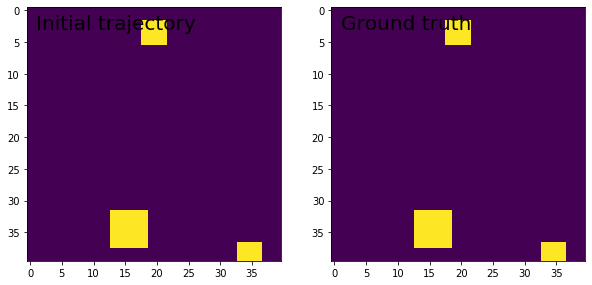

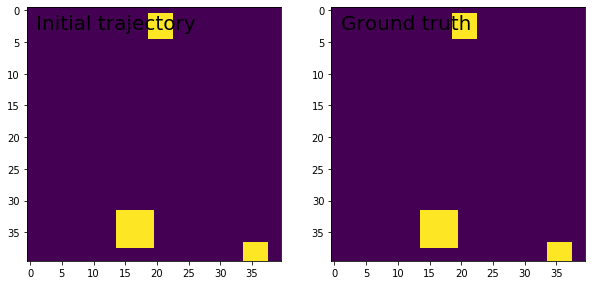

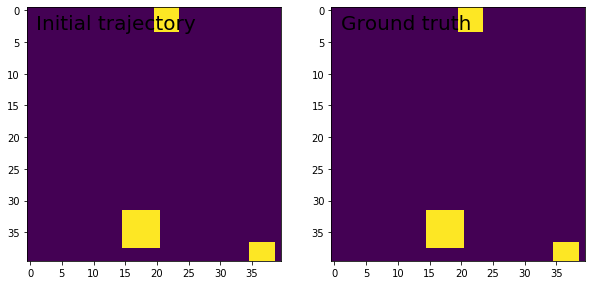

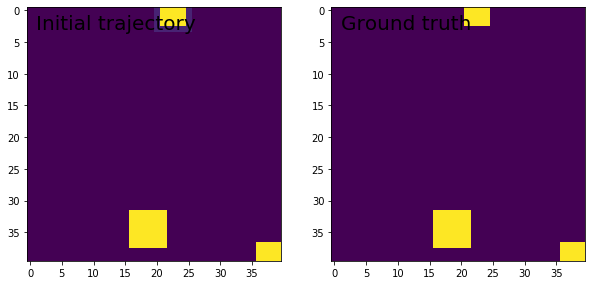

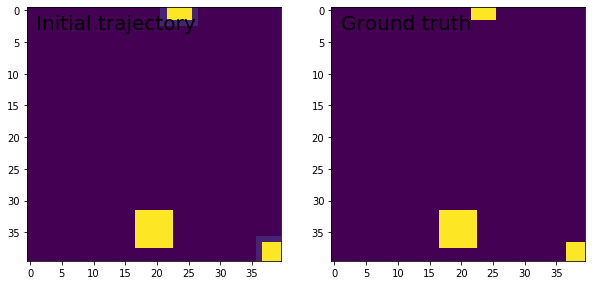

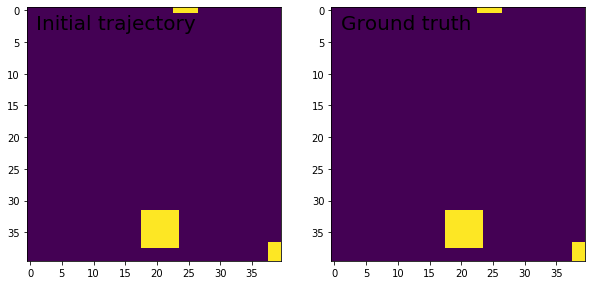

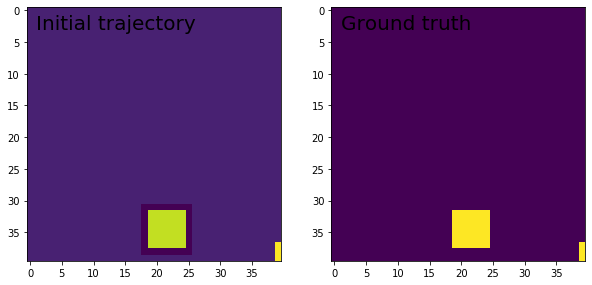

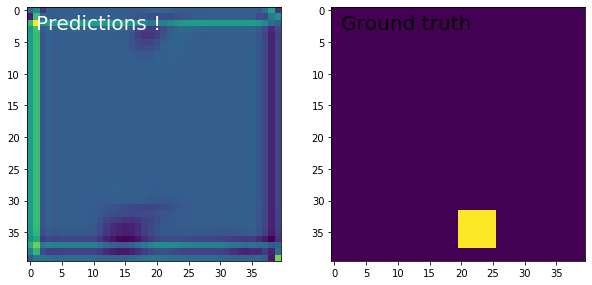

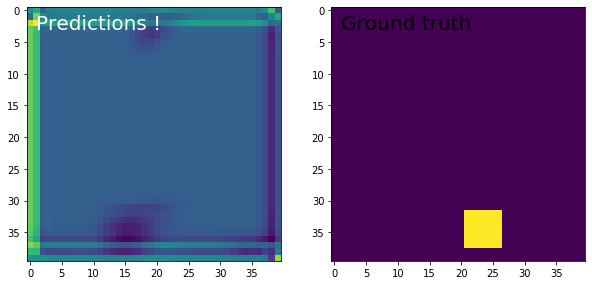

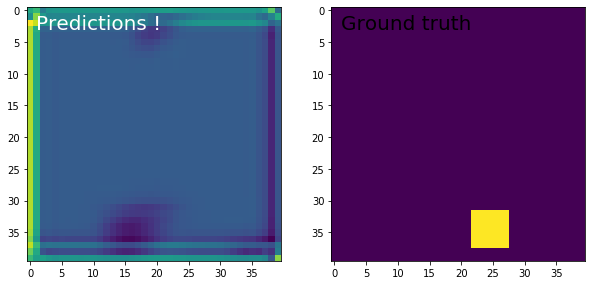

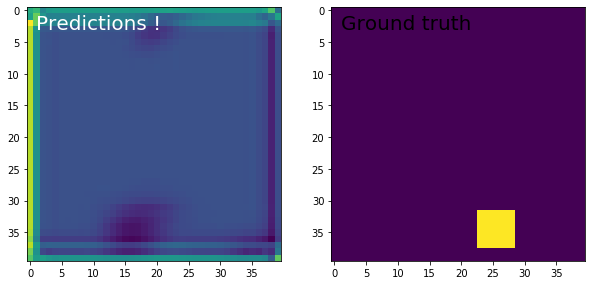

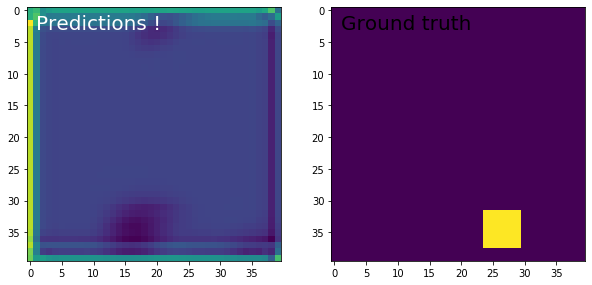

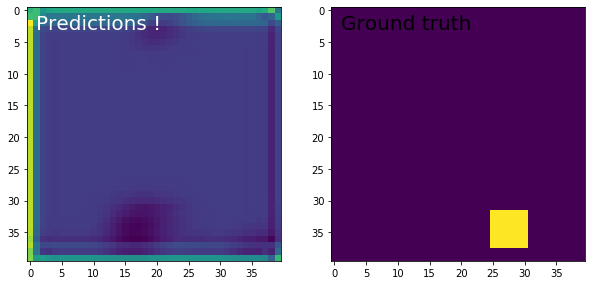

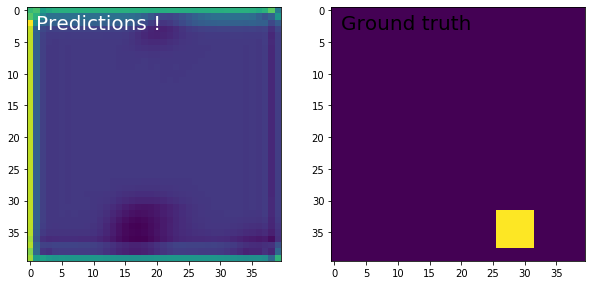

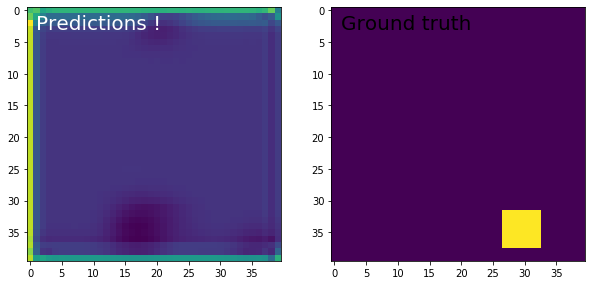

In [3]:
for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)

# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

## 【問題3】他のクラスの説明

RNN  
　リカレントニューラルネットワーク。ある層の出力が遡って入力される再帰結合を持つニューラルネットワーク）。  
　  
SimpleRNNCell  
　RNNの1つのセルクラス。複数のRNNセルが積層されることにより（あるいは単体のＲＮＮセルにより）ＲＮＮが構成されて、このＲＮＮからの外部への出力が再びＲＮＮに入力される（時系列の異なる入力とともに再帰的入力がなされる。）。  
　  
GRUCell  
  RNNの再帰結合にてゲートが加えられたの1つのセルクラス（複数積層用の１ブロック）。ゲートは、再帰結合による書き込みの制御をおこなう。  
　  
LSTMCell  
　Long Short Term Memory ネットワークは長期的な依存関係を学習することのできるRNNの一種。  
　通常のRNNが有する欠点（勾配消失の問題により直近の時系列データによる影響が大きく反映されがちになる）を補うものであり、長期的な記憶に対応したネットワークが組み合わされたネットワークになっている。RNNからのInputゲートと、forgetゲート、LSTMからRNNへのOutputゲートを有しており、これらの制御によって長期的な記憶が反映されるようになっている。  
　またLSTMCellも、１つのセルクラスであって積層されることで利用される。  
　  
StackedRNNCells  
　RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー。効率的なstacked RNNを実装するために使われる．  
cells = [  
    keras.layers.LSTMCell(output_dim),  
    keras.layers.LSTMCell(output_dim),  
    keras.layers.LSTMCell(output_dim),  
    ]  
　  
CuDNNGRU  
　NVIDIAが公開しているCuDNNライブラリ（GPUの利用を前提とする）に対応したGRU  
　  
CuDNNLSTM  
　NVIDIAが公開しているCuDNNライブラリ（GPUの利用を前提とする）に対応したLSTM  


＜その他メモ＞
遷移行列（推移行列）：ＲＮＮのリカレントに掛け合わされるｗのこと。ｗの特異値が１でなければ勾配消失、勾配爆発になる。

ＬＳＴＭ　
　推移行列、ＴａｎＨのところまではＲＮＮと同様。
　ゲートによるバイパスがあり（シグモイド）、アダマールする。確率的に数値を落としている。
　長期記憶の流れ（ＬＳＴＭによるバイパス）と、短期記憶の流れがある（ＲＮＮ的）。
　
　ｗｈとｗｘ、あと４つの分岐の学習をする。
　ｃへの繋がりには、ドット演算がなく、アダマールとプラスしかないので消失や爆発がない。
　tanhの温度。
　高温だとランダム。低温だと同じような単語が並ぶ。
　ロジっトをスケーリングして予測のランダム性を制御するために使用されるＬＳＴＭである。